In [1]:
import dataset
import pca_helper
import numpy as np
import clustering_helper

In [2]:
dataset_generator = dataset.DatasetGenerator(alg='speck_32_64')
nr = 5
datasize = 10000
lambda_base = 1/64
t0 = 0.1 * lambda_base
eigenvalue_ratios = np.zeros((32,64), dtype=float)
eigenvalue_vectors = np.zeros((32,64,64), dtype=float)
projected_data = np.zeros((32, datasize, 3))
labels = np.zeros((32, datasize,))
silhouette_score = np.zeros((32))

* input_diff = (0x0001, 0x0000)
   - threshold: 0.0015625, number of biased PCs: 20
   - largest rho - lambda_base: 0.005020495016718762


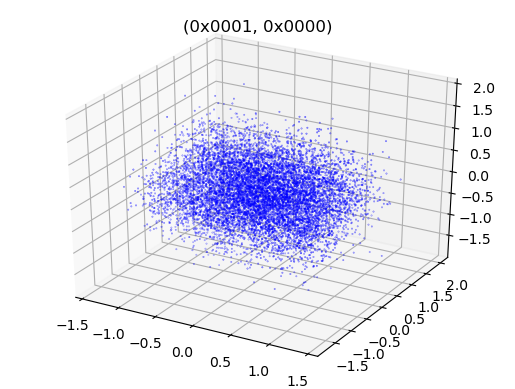

(10000,)


InvalidParameterError: The 'labels' parameter of silhouette_score must be an array-like. Got 7 instead.

In [3]:
# leftside word, hw=1
for i in range(16):
    input_diff = (1 << i, 0)
    input_diff_str = f'(0x{input_diff[0]:04X}, 0x{input_diff[1]:04X})'
    print(f'* input_diff = {input_diff_str}')

    speck_nr5 = dataset_generator.gen_real_dataset(input_diff, nr, datasize)

    eigenvalue_ratio, eigenvector = pca_helper.EigenValueDecomposition(dataset=speck_nr5)
    eigenvalue_ratios[i+16] = eigenvalue_ratio
    eigenvalue_vectors[i+16] = eigenvector
    print(f'   - threshold: {t0}, number of biased PCs: {sum(abs(eigenvalue_ratios[i+16] - lambda_base) > t0)}')
    print(f'   - largest rho - lambda_base: {max(eigenvalue_ratios[i+16]) - lambda_base}')

    projected_data[i+16] = pca_helper.DimensionReduction(dataset=speck_nr5, title=input_diff_str)
    pca_helper.Visualize3D(pca_results_3D=projected_data[i+16], title=input_diff_str)

    labels[i+16] = clustering_helper.kmeans_clustering(data=projected_data[i+16], num_clusters=3**3)
    print(labels.shape)
    silhouette_score[i+16] = clustering_helper.calculate_silhouette(data=projected_data[i+16], labels=labels[i+16])
    # clustering_helper.visualize_clusters(projected_data[i+16], labels[i+16], title=input_diff_str)


* input_diff = (0x0000, 0x0001)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.00034247128282166583


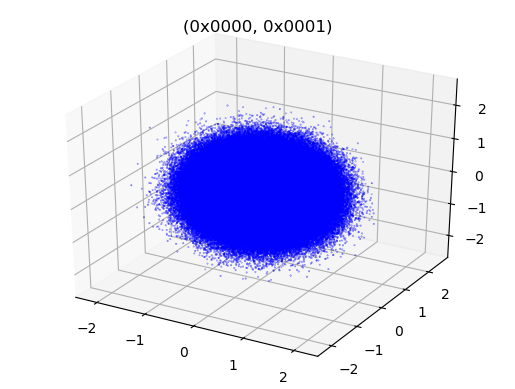

* input_diff = (0x0000, 0x0002)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0006415323536172954


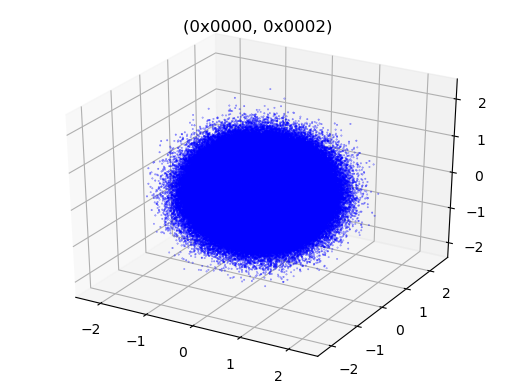

* input_diff = (0x0000, 0x0004)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0007950722353805562


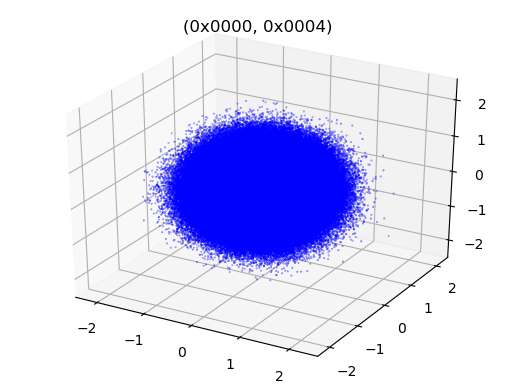

* input_diff = (0x0000, 0x0008)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.000498832460089492


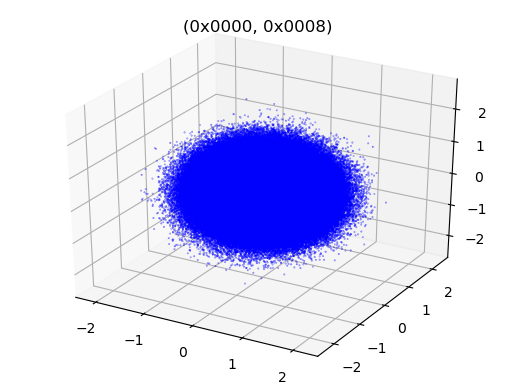

* input_diff = (0x0000, 0x0010)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0006252712934458685


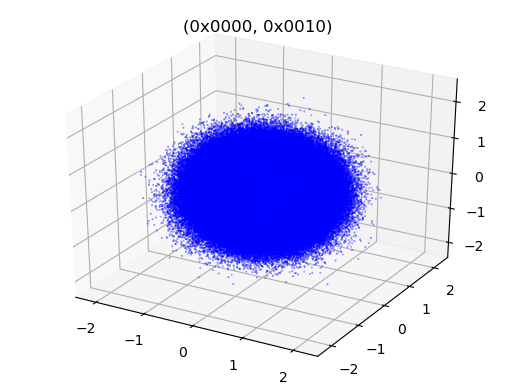

* input_diff = (0x0000, 0x0020)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0008038116728576981


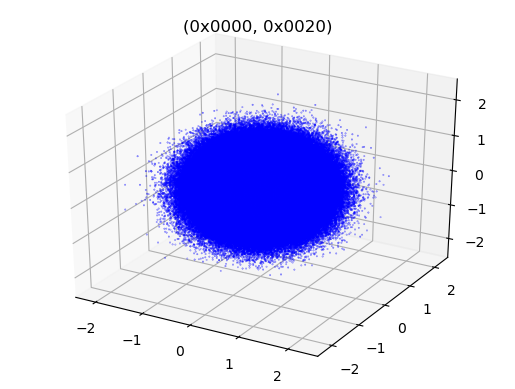

* input_diff = (0x0000, 0x0040)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0008563846552329356


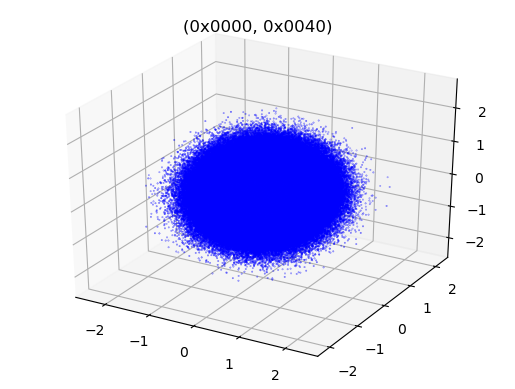

* input_diff = (0x0000, 0x0080)
   - threshold: 0.0015625, number of biased PCs: 2
   - largest rho - lambda_base: 0.0040481210095510735


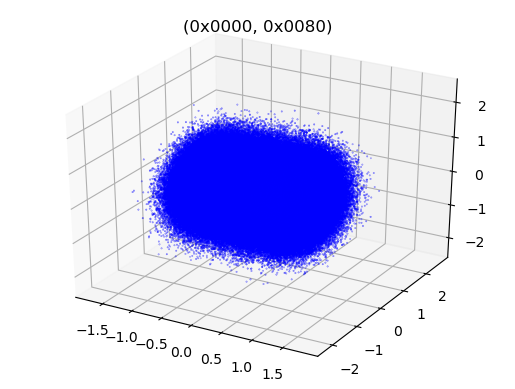

* input_diff = (0x0000, 0x0100)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0009683500781634824


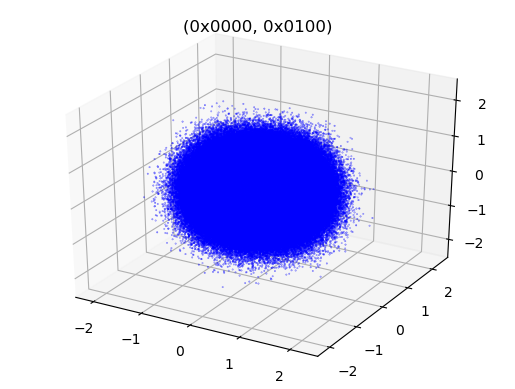

* input_diff = (0x0000, 0x0200)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.000827976340534959


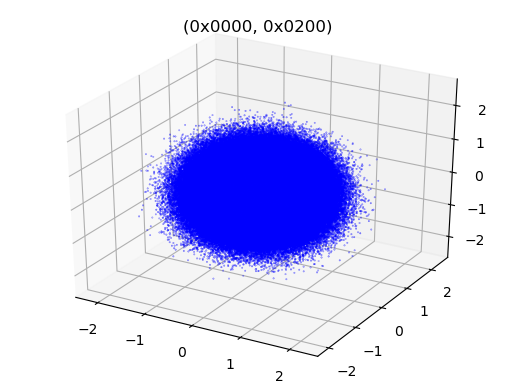

* input_diff = (0x0000, 0x0400)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.00047510284117990853


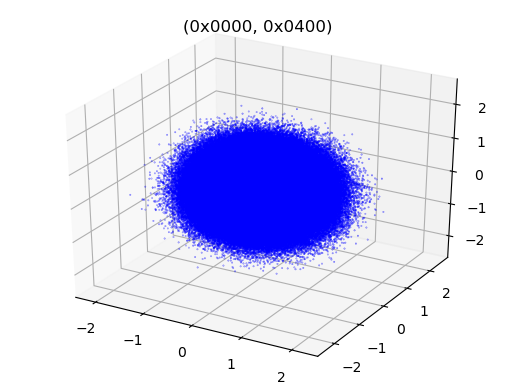

* input_diff = (0x0000, 0x0800)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0007465284722636932


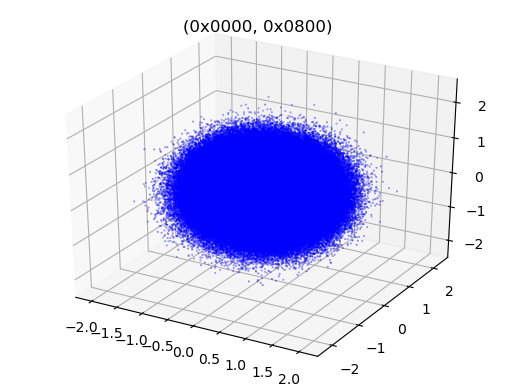

* input_diff = (0x0000, 0x1000)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.00036067842107062945


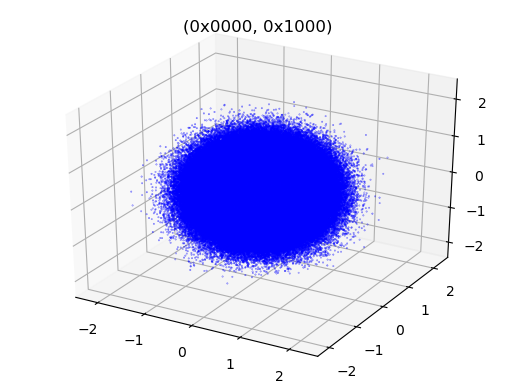

* input_diff = (0x0000, 0x2000)
   - threshold: 0.0015625, number of biased PCs: 0
   - largest rho - lambda_base: 0.0005704263535174503


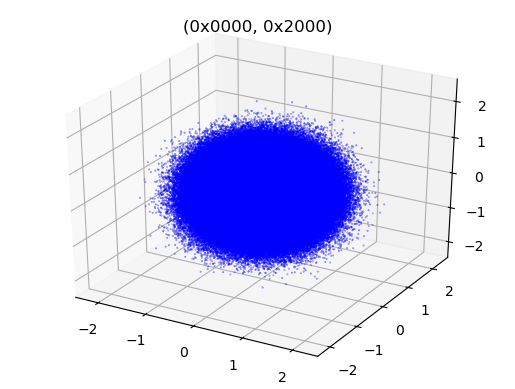

* input_diff = (0x0000, 0x4000)
   - threshold: 0.0015625, number of biased PCs: 4
   - largest rho - lambda_base: 0.007237331004484357


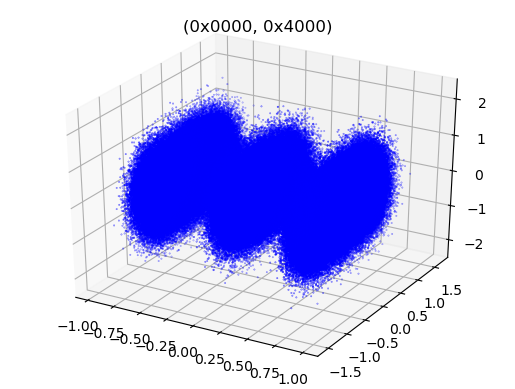

* input_diff = (0x0000, 0x8000)
   - threshold: 0.0015625, number of biased PCs: 6
   - largest rho - lambda_base: 0.007501747780114976


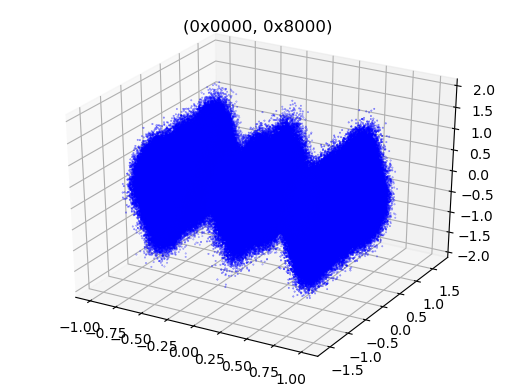

In [4]:
# rightside word, hw=1
for i in range(16):
    input_diff = (0x0, 1 << i)
    input_diff_str = f'(0x{input_diff[0]:04X}, 0x{input_diff[1]:04X})'
    print(f'* input_diff = {input_diff_str}')
    speck_nr5 = dataset_generator.gen_real_dataset(input_diff, nr, datasize)
    eigenvalue_ratio, eigenvector = pca_helper.EigenValueDecomposition(dataset=speck_nr5)
    eigenvalue_ratios[i] = eigenvalue_ratio
    eigenvalue_vectors[i] = eigenvector
    print(f'   - threshold: {t0}, number of biased PCs: {sum(abs(eigenvalue_ratios[i] - lambda_base) > t0)}')
    print(f'   - largest rho - lambda_base: {max(eigenvalue_ratios[i]) - lambda_base}')
    pca_helper.Visualize3D(dataset=speck_nr5, title=input_diff_str)

In [5]:
for i in range(32):
    print(f'i: 0x{format((1<<i), "08x")}, The number of siginificant rho: {sum(abs(eigenvalue_ratios[i] - lambda_base) > (0.1*lambda_base))}, max_diff: {round(max(abs(eigenvalue_ratios[i] - lambda_base)), 5)}')

i: 0x00000001, The number of siginificant rho: 0, max_diff: 0.00034
i: 0x00000002, The number of siginificant rho: 0, max_diff: 0.00064
i: 0x00000004, The number of siginificant rho: 0, max_diff: 0.0008
i: 0x00000008, The number of siginificant rho: 0, max_diff: 0.0005
i: 0x00000010, The number of siginificant rho: 0, max_diff: 0.00063
i: 0x00000020, The number of siginificant rho: 0, max_diff: 0.00081
i: 0x00000040, The number of siginificant rho: 0, max_diff: 0.00086
i: 0x00000080, The number of siginificant rho: 2, max_diff: 0.00405
i: 0x00000100, The number of siginificant rho: 0, max_diff: 0.00097
i: 0x00000200, The number of siginificant rho: 0, max_diff: 0.00083
i: 0x00000400, The number of siginificant rho: 0, max_diff: 0.00048
i: 0x00000800, The number of siginificant rho: 0, max_diff: 0.00075
i: 0x00001000, The number of siginificant rho: 0, max_diff: 0.00036
i: 0x00002000, The number of siginificant rho: 0, max_diff: 0.00057
i: 0x00004000, The number of siginificant rho: 4, 

In [9]:
np.save('eigenvalue_raito_speck_nr5_1000000_ver3.npy', eigenvalue_ratio)

In [24]:
np.set_printoptions(suppress=False)
arounded_rho_00400000 = np.around(eigenvalue_ratios[22]-lambda_base, 5)

for i in range(len(arounded_rho_00400000)):
    print(arounded_rho_00400000[i])

0.01195
0.01013
0.00842
0.00587
0.00553
0.00476
0.00337
0.00306
0.0019
0.001
0.0008
0.00079
0.00074
0.00054
0.00036
0.00025
0.00022
0.00017
0.00016
0.00016
0.00014
0.00011
0.0001
9e-05
6e-05
6e-05
5e-05
4e-05
3e-05
2e-05
2e-05
-0.0
-1e-05
-2e-05
-3e-05
-3e-05
-5e-05
-6e-05
-7e-05
-8e-05
-8e-05
-9e-05
-0.00011
-0.00014
-0.00014
-0.00015
-0.00018
-0.00021
-0.00026
-0.00038
-0.00053
-0.00074
-0.00076
-0.00082
-0.001
-0.00189
-0.00306
-0.00337
-0.00476
-0.00553
-0.00587
-0.00842
-0.01013
-0.01195


In [11]:
arounded_eigenvalue_vectors = np.around(eigenvalue_vectors, 2)

In [14]:
# (0x0040, 0x000) Dataset's eigenvector
# The index of (0x0040, 0x000) Dataset: 22
# Top 8 eigenvectors' coefficients
for i in range(8):
    C0_l = arounded_eigenvalue_vectors[22][i][:16]
    C0_r = arounded_eigenvalue_vectors[22][i][16:32]
    C1_l = arounded_eigenvalue_vectors[22][i][32:48]
    C1_r = arounded_eigenvalue_vectors[22][i][48:]
    print(f'PC{i}-C0_l: {C0_l}')
    print(f'PC{i}-C0_r: {C0_r}')
    print(f'PC{i}-C1_l: {C1_l}')
    print(f'PC{i}-C1_r: {C1_r}')


PC0-C0_l: [ 0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.    0.   -0.    0.
  0.    0.   -0.71  0.  ]
PC0-C0_r: [ 0.   -0.    0.   -0.   -0.    0.   -0.   -0.   -0.    0.    0.    0.
  0.    0.   -0.01 -0.  ]
PC0-C1_l: [ 0.   -0.   -0.    0.   -0.   -0.   -0.   -0.   -0.    0.    0.   -0.
 -0.    0.    0.71  0.  ]
PC0-C1_r: [-0.    0.   -0.   -0.    0.   -0.    0.   -0.   -0.    0.    0.   -0.
 -0.   -0.   -0.01 -0.  ]
PC1-C0_l: [ 0.    0.   -0.   -0.    0.   -0.   -0.   -0.    0.    0.   -0.    0.
 -0.   -0.    0.    0.71]
PC1-C0_r: [-0.    0.   -0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.
  0.   -0.    0.01  0.  ]
PC1-C1_l: [-0.    0.   -0.   -0.   -0.   -0.    0.    0.    0.   -0.    0.    0.
  0.   -0.   -0.    0.71]
PC1-C1_r: [-0.    0.    0.    0.   -0.    0.   -0.   -0.    0.   -0.   -0.    0.
 -0.    0.    0.01  0.  ]
PC2-C0_l: [-0.   -0.   -0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.
 -0.   -0.    0.01  0.01]
PC2-C0_r: [-0.    0.   -0.    0.   -0

In [15]:
# (0x0040, 0x000) Dataset's eigenvector
# The index of (0x0040, 0x000) Dataset: 22
# Bottom 8 eigenvectors' coefficients
for i in range(8):
    C0_l = arounded_eigenvalue_vectors[22][i+56][:16]
    C0_r = arounded_eigenvalue_vectors[22][i+56][16:32]
    C1_l = arounded_eigenvalue_vectors[22][i+56][32:48]
    C1_r = arounded_eigenvalue_vectors[22][i+56][48:]
    print(f'PC{i+56}-C0_l: {C0_l}')
    print(f'PC{i+56}-C0_r: {C0_r}')
    print(f'PC{i+56}-C1_l: {C1_l}')
    print(f'PC{i+56}-C1_r: {C1_r}')


PC56-C0_l: [-0.02 -0.01 -0.    0.    0.    0.    0.01 -0.    0.71  0.01  0.01 -0.
 -0.   -0.    0.   -0.  ]
PC56-C0_r: [-0.01  0.   -0.    0.    0.    0.01 -0.    0.    0.    0.01  0.   -0.01
 -0.   -0.    0.    0.  ]
PC56-C1_l: [-0.02 -0.    0.   -0.01 -0.    0.    0.    0.   -0.71 -0.   -0.01  0.
 -0.01  0.   -0.    0.  ]
PC56-C1_r: [-0.   -0.   -0.   -0.    0.    0.   -0.    0.   -0.    0.   -0.01 -0.01
 -0.   -0.   -0.   -0.  ]
PC57-C0_l: [ 0.71  0.   -0.   -0.    0.    0.   -0.01  0.    0.02 -0.   -0.    0.
  0.01  0.   -0.   -0.  ]
PC57-C0_r: [ 0.01 -0.01  0.01  0.   -0.   -0.01  0.    0.    0.01  0.    0.   -0.
  0.   -0.   -0.    0.  ]
PC57-C1_l: [ 0.71  0.    0.01  0.01  0.   -0.   -0.    0.   -0.02  0.01  0.01 -0.
  0.01 -0.   -0.   -0.  ]
PC57-C1_r: [ 0.01 -0.   -0.    0.   -0.01 -0.    0.01 -0.    0.    0.    0.   -0.
 -0.    0.01  0.   -0.  ]
PC58-C0_l: [ 0.01 -0.   -0.   -0.    0.   -0.   -0.01 -0.01 -0.    0.    0.    0.
 -0.   -0.    0.    0.  ]
PC58-C0_r: [-0.01  0.   

   - threshold: 0.0015625, number of biased PCs: 0
   - largest lambda - lambda_base: 0.00024451284430093007


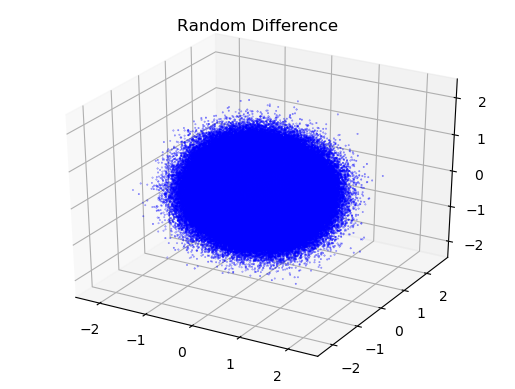

array([[ 0.18292019, -0.0985056 , -0.20682887],
       [-0.54628201,  0.13668038,  0.08377596],
       [-0.23251479,  1.1792313 ,  0.38205617],
       ...,
       [-0.01784876, -0.11747093, -0.63570683],
       [-0.00395874,  0.55792548, -0.45466699],
       [ 0.5905157 ,  0.23567232, -0.57641133]])

In [27]:
speck_nr5 = dataset_generator.gen_random_dataset(nr, datasize)
random_eigenvalue_ratio, random_eigenvector = pca_helper.EigenValueDecomposition(dataset=speck_nr5)
print(f'   - threshold: {t0}, number of biased PCs: {sum(abs(random_eigenvalue_ratio - lambda_base > t0))}')
print(f'   - largest lambda - lambda_base: {max(random_eigenvalue_ratio) - lambda_base}')
pca_helper.Visualize3D(dataset=speck_nr5, title='Random Difference')

In [29]:
arouned_random_eigenvalue_ratio = np.around(random_eigenvalue_ratio-lambda_base, 5)
for i in range(len(arouned_random_eigenvalue_ratio)):
    print(arouned_random_eigenvalue_ratio[i])

0.00024
0.00023
0.00021
0.00019
0.00018
0.00017
0.00016
0.00015
0.00014
0.00013
0.00013
0.00012
0.00012
0.00012
0.00011
0.00011
0.0001
9e-05
9e-05
8e-05
7e-05
7e-05
6e-05
5e-05
5e-05
4e-05
4e-05
3e-05
2e-05
2e-05
1e-05
0.0
0.0
-1e-05
-2e-05
-2e-05
-2e-05
-4e-05
-4e-05
-5e-05
-6e-05
-6e-05
-6e-05
-7e-05
-7e-05
-8e-05
-9e-05
-0.0001
-0.0001
-0.00011
-0.00012
-0.00012
-0.00012
-0.00014
-0.00015
-0.00016
-0.00016
-0.00017
-0.00017
-0.00018
-0.0002
-0.00021
-0.00022
-0.00024


In [ ]:
speck_nr5 = dataset_generator.gen_real_dataset(input_diff, nr, datasize)
eigenvalue_ratio, eigenvector = pca_helper.DimensionReduction(dataset=speck_nr5, n_components=3)
    eigenvalue_ratios[i] = eigenvalue_ratio
    eigenvalue_vectors[i] = eigenvector